In [21]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

from environment import *
from car         import *


def run_episode(env, car, lr, disc):
    env.reset()
    car.reset_memory()
    s = env.visited[0]
    
    max_step = env.n_stops
    reward = 0

    for _ in range(max_step):
        car.remember_state(s)
        a = car.take_action(s)
        r, done = env.transition(a)

        car.train(s, a, r, lr, disc)

        reward += r
        s = a

        if done:
            break

    return env, car, reward

def run_episodes(env, car, lr, disc, nb_episodes = 10000):
    rewards = []
    frames  = []

    for i in tqdm(range(nb_episodes)):
        env, car, reward = run_episode(env, car, lr, disc)
        rewards.append(reward)


def show_path(env, car, fname = "path.png"):
        fig = plt.figure(figsize=(env.n, env.m))
        ax = fig.add_subplot(111)

        # plot contours
        ax.plot([0, env.n], [0, 0], c='b')
        ax.plot([0, env.n], [env.m, env.m], c='b')
        ax.plot([0, 0], [0, env.m], c='b')
        ax.plot([env.n, env.n], [0, env.m], c='b')

        # plot stops
        ax.scatter(*zip(*env.stops), c='r')

        # plot obstacles
        for obst in env.obstacles:
            x1, y1 = obst[0]
            x2, y2 = obst[1]
            ax.plot([x1, x2], [y1, y1], c='b')
            ax.plot([x1, x2], [y2, y2], c='b')
            ax.plot([x1, x1], [y1, y2], c='b')
            ax.plot([x2, x2], [y1, y2], c='b')

        trajectory = list_trajectory(env, car)

        for i in range(len(trajectory) - 1):
            x0, y0 = trajectory[i]
            x1, y1 = trajectory[i + 1]
            ax.arrow(x0, y0, (x1-x0)*0.8, (y1-y0)*0.8, width=0.1, head_width=0.3, color="r")
        
        x0, y0 = x1, y1
        x1, y1 = trajectory[0]
        ax.arrow(x0, y0, (x1-x0)*0.8, (y1-y0)*0.8, width=0.1, head_width=0.3, color="r")

        plt.savefig(fname)
        plt.show()


def list_trajectory(env, car):
    s = np.random.randint(0, env.n_stops - 1)
    x, y = env.s_to_coord[s]
    trajectory = [(x, y)]

    for _ in range(1, env.n_stops):
        q = np.delete(car.Q[s, :], s)
        s2 = np.argmax(car.Q[s, :])
        x, y = env.s_to_coord[s2]
        trajectory.append((x, y))
        s = s2

    return trajectory




lr = 0.1
disc = 0.9

env = Environment()
car = Car(env)

In [22]:
run_episodes(env, car, lr, disc, 10000)

100%|██████████| 10000/10000 [02:16<00:00, 73.07it/s]


In [54]:
def list_trajectory(env, car):
    s = np.random.randint(0, env.n_stops - 1)
    x, y = env.s_to_coord[s]
    trajectory = [(x, y)]

    for _ in range(1, env.n_stops):
        q = np.copy(car.Q[s, :])
        q[s] = - np.inf
        s2 = np.argmax(q)
        x, y = env.s_to_coord[s2]
        trajectory.append((x, y))
        s = s2

    return trajectory

In [60]:
def list_trajectory(env, car):
    trajectory = []

    for i , s in enumerate(env.visited):
        x, y = env.s_to_coord[s]
        trajectory.append((x, y))

    return trajectory

In [61]:
trajectory = list_trajectory(env, car)
print(trajectory)

[(18, 10), (17, 10), (20, 10), (22, 10), (22, 8), (22, 6), (22, 4), (22, 2), (20, 2), (18, 2), (16, 2), (14, 2), (12, 2), (10, 2), (10, 4), (10, 6), (10, 8), (10, 22), (8, 22), (8, 20), (6, 20), (4, 20), (4, 18), (4, 16), (4, 14), (4, 12), (4, 10), (4, 8), (4, 6), (4, 4), (4, 2), (2, 2), (2, 4), (2, 6), (2, 8), (2, 10), (2, 12), (2, 14), (2, 16), (2, 18), (2, 20), (2, 22), (4, 22), (6, 22), (8, 24), (6, 24), (4, 24), (2, 24), (2, 26), (4, 26), (6, 26), (8, 26), (10, 26), (10, 24), (12, 24), (12, 22), (14, 22), (16, 22), (16, 24), (14, 24), (14, 26), (16, 26), (16, 28), (14, 28), (14, 30), (16, 30), (16, 32), (14, 32), (12, 32), (12, 30), (12, 28), (12, 26), (10, 28), (8, 28), (6, 28), (4, 28), (2, 28), (2, 30), (4, 30), (6, 30), (8, 30), (10, 30), (10, 32), (8, 32), (6, 32), (4, 32), (2, 32), (2, 34), (4, 34), (4, 38), (4, 36), (2, 36), (2, 38), (2, 40), (4, 40), (6, 40), (6, 38), (6, 36), (6, 34), (8, 34), (10, 34), (12, 34), (14, 34), (16, 34), (18, 34), (18, 32), (18, 30), (18, 28),

In [17]:
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

In [58]:
print(car.Q[10])

[-20.         -18.         -16.         -14.         -12.
 -10.          -8.          -6.          -4.          -2.
  -0.          -2.          -4.          -6.          -8.
 -10.         -11.         -20.09975124 -18.11077028 -16.1245155
 -14.14213562 -12.16552506 -10.19803903  -8.24621125  -6.32455532
  -4.47213595  -2.82842712  -2.          -2.82842712  -4.47213595
  -6.32455532  -8.24621125 -10.19803903 -11.18033989 -20.39607805
 -18.43908891 -16.4924225  -14.56021978 -12.64911064 -10.77032961
  -8.94427191  -7.21110255  -5.65685425  -4.47213595  -4.
  -4.47213595  -5.65685425  -7.21110255  -8.94427191 -10.77032961
 -11.70469991 -20.88061302 -18.97366596 -17.08800749 -15.23154621
 -13.41640786 -11.66190379 -10.          -8.48528137  -7.21110255
  -6.32455532  -6.          -6.32455532  -7.21110255  -8.48528137
 -10.         -11.66190379 -12.52996409 -21.54065923 -19.6977156
 -17.88854382 -16.1245155   -9.43398113  -8.94427191  -8.24621125
  -8.          -8.24621125  -8.94427191 -10.

In [65]:
def show_path(env, car, fname = "path.png"):
        fig = plt.figure(figsize=(env.n, env.m))
        ax = fig.add_subplot(111)

        # plot contours
        ax.plot([0, env.n], [0, 0], c='b')
        ax.plot([0, env.n], [env.m, env.m], c='b')
        ax.plot([0, 0], [0, env.m], c='b')
        ax.plot([env.n, env.n], [0, env.m], c='b')

        # plot stops
        ax.scatter(*zip(*env.stops), c='r')

        # plot obstacles
        for obst in env.obstacles:
            x1, y1 = obst[0]
            x2, y2 = obst[1]
            ax.plot([x1, x2], [y1, y1], c='b')
            ax.plot([x1, x2], [y2, y2], c='b')
            ax.plot([x1, x1], [y1, y2], c='b')
            ax.plot([x2, x2], [y1, y2], c='b')

        trajectory = list_trajectory(env, car)

        for i in range(len(trajectory) - 1):
            x0, y0 = trajectory[i]
            x1, y1 = trajectory[i + 1]
            ax.arrow(x0, y0, (x1-x0)*0.95, (y1-y0)*0.95, width=0.1, head_width=0.3, color="r")
        
        x0, y0 = x1, y1
        x1, y1 = trajectory[0]
        ax.arrow(x0, y0, (x1-x0)*0.8, (y1-y0)*0.8, width=0.1, head_width=0.3, color="r")

        plt.savefig(fname)
        plt.show()

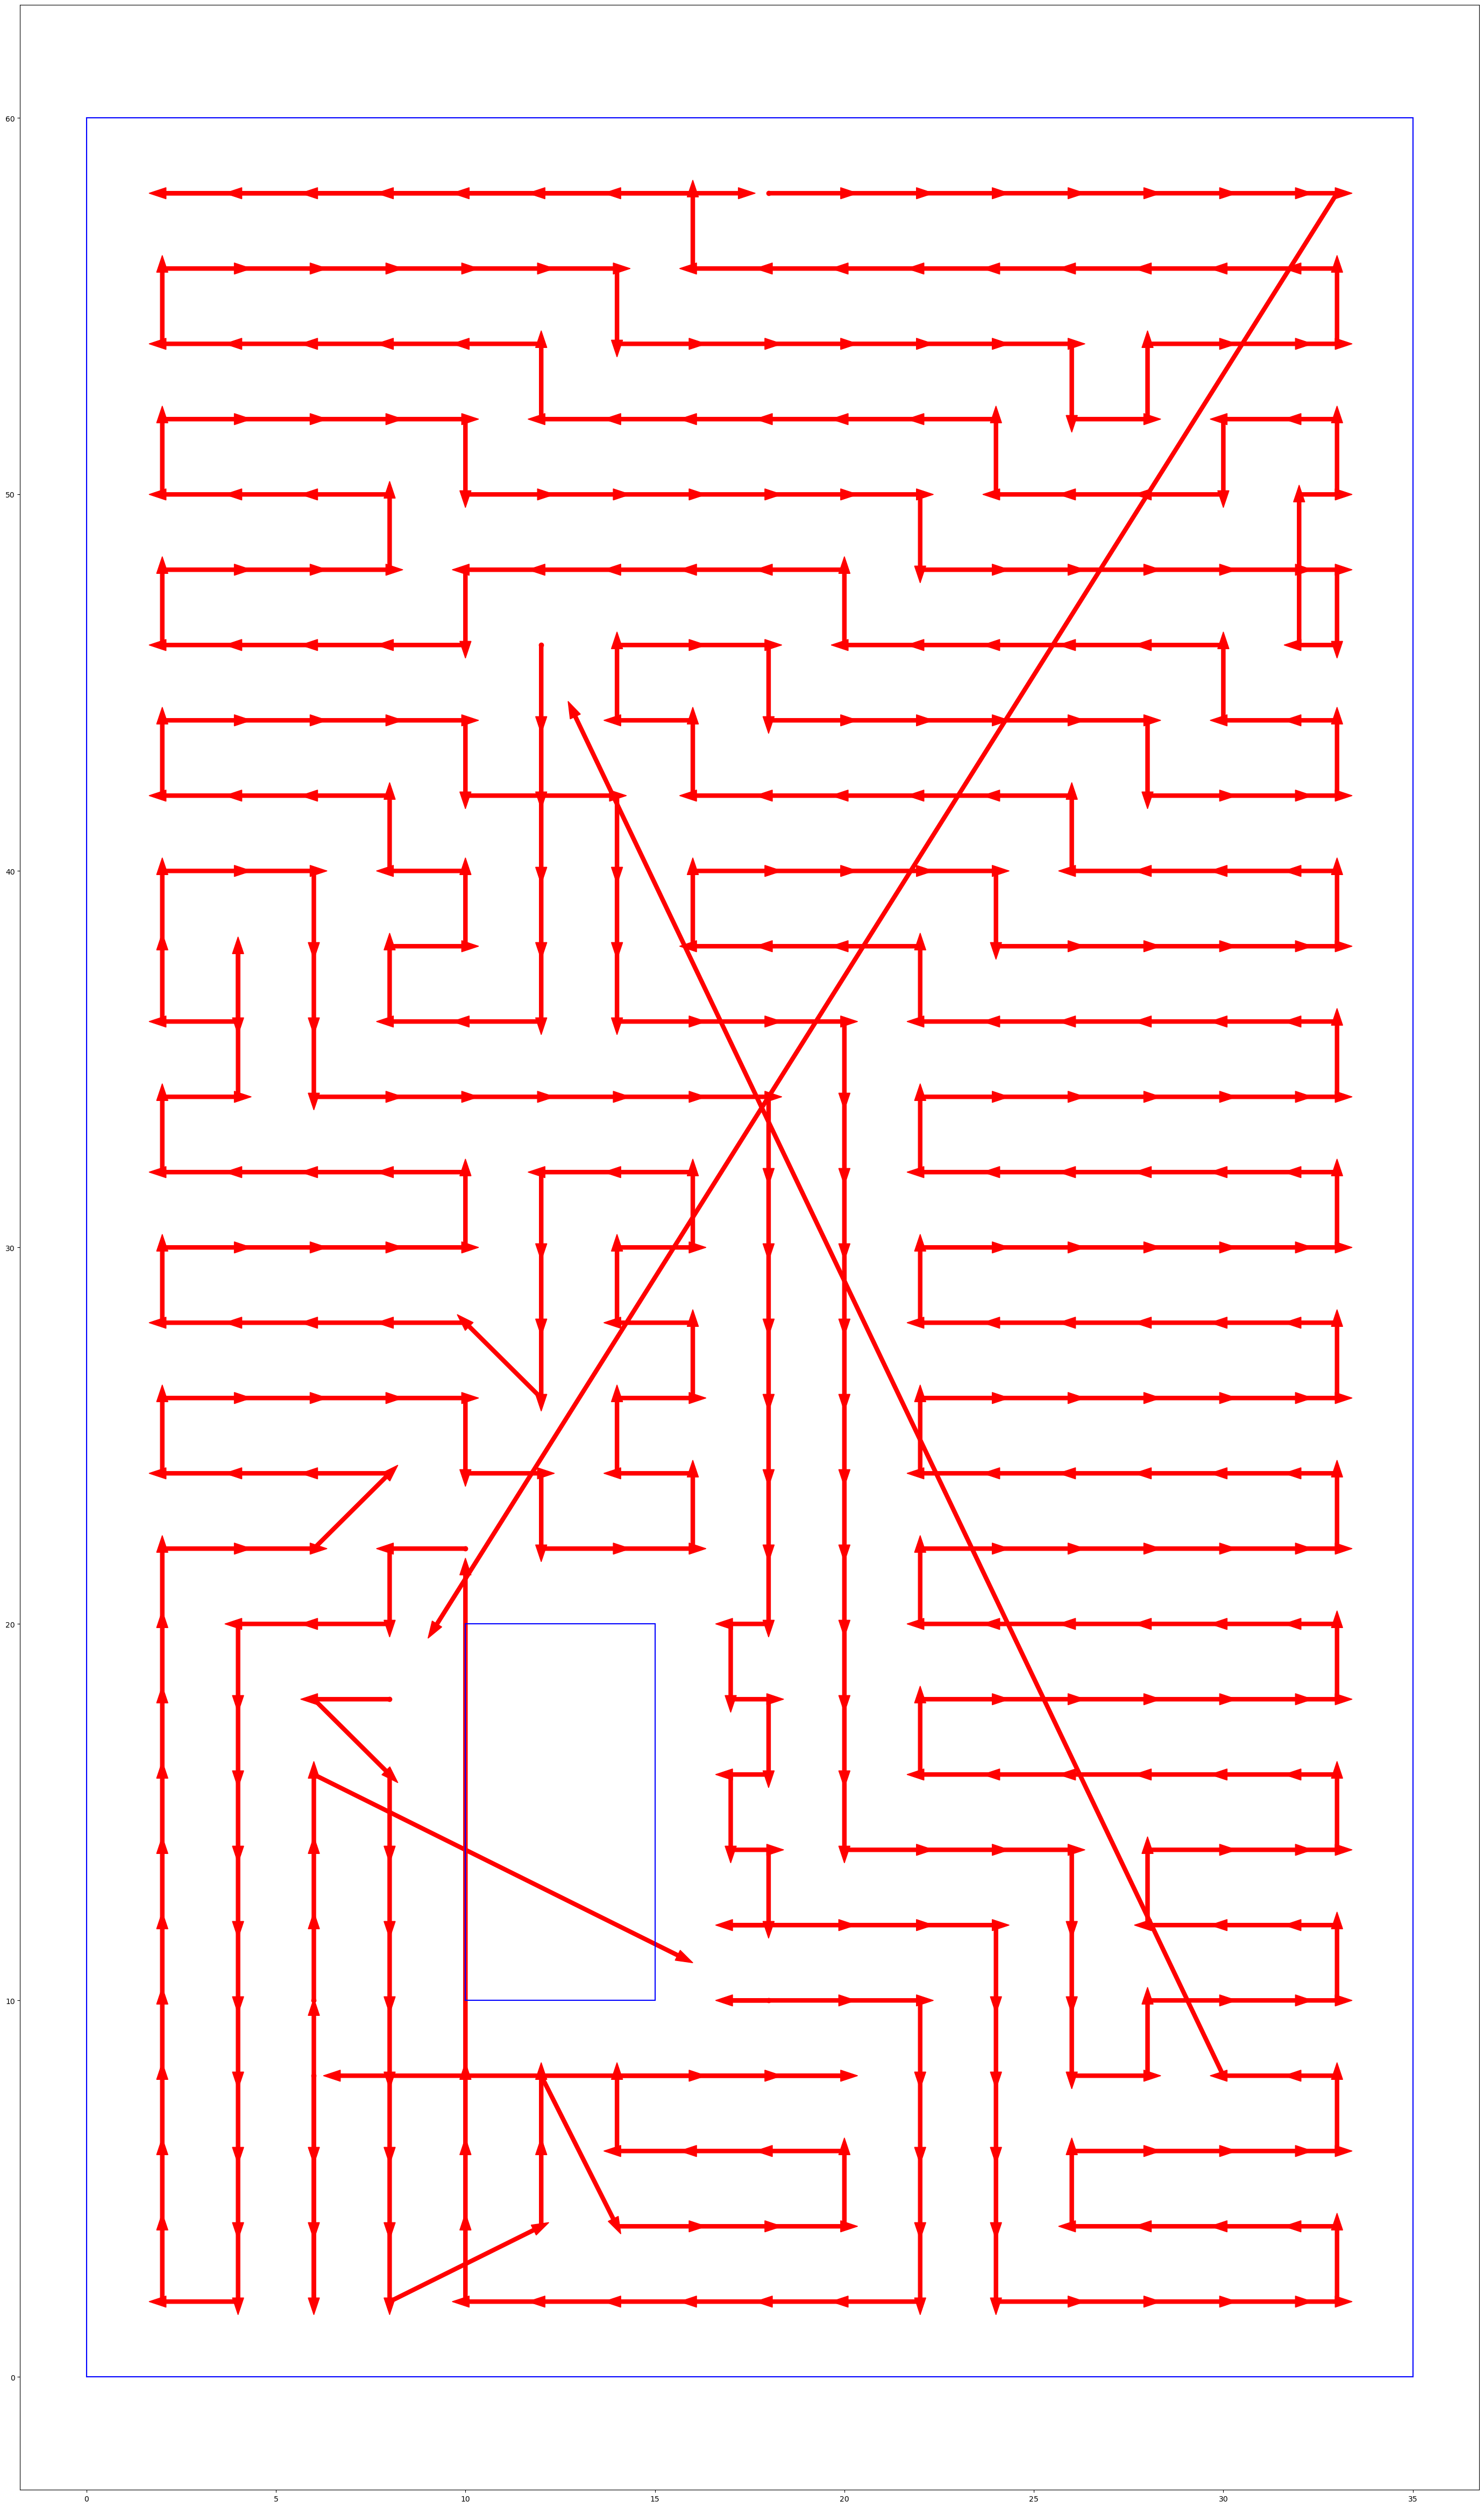

In [66]:
show_path(env, car, "path.png")